In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

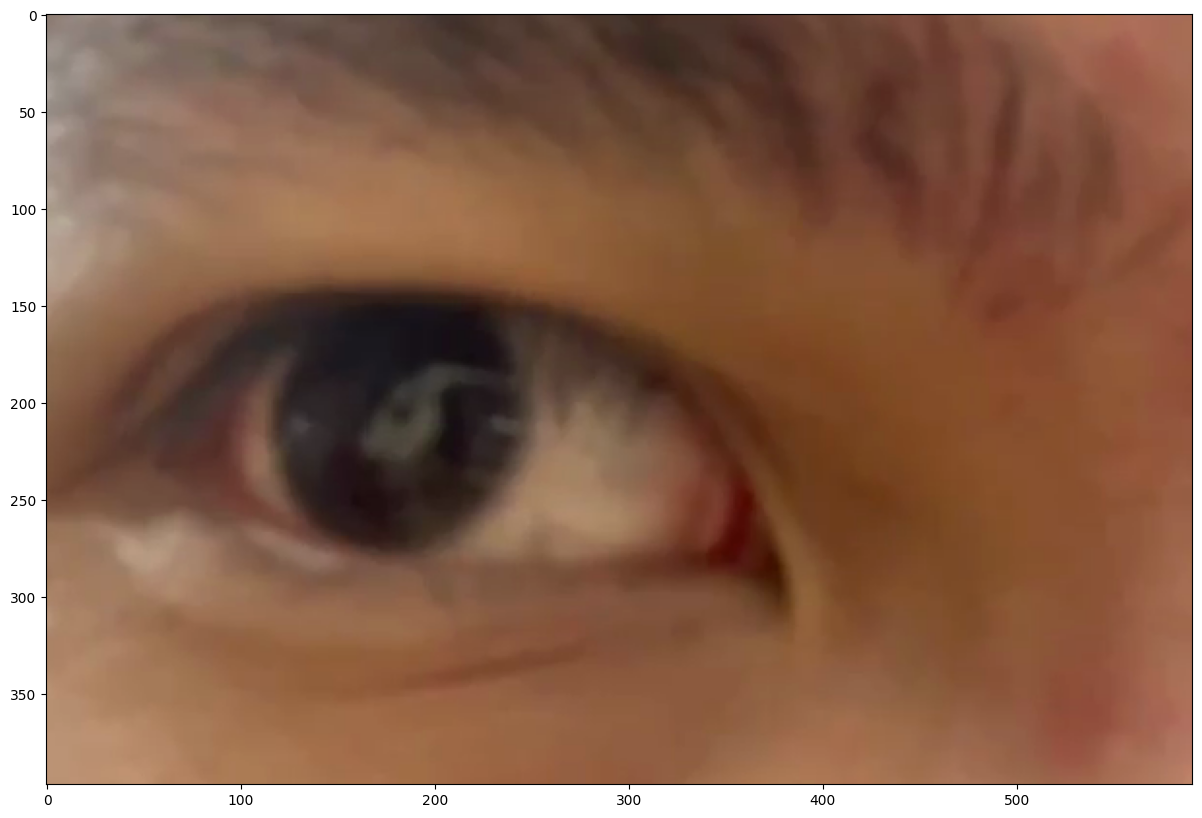

In [109]:
# Reading the image.
img = cv2.imread('eye.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15, 10))
plt.imshow(img);

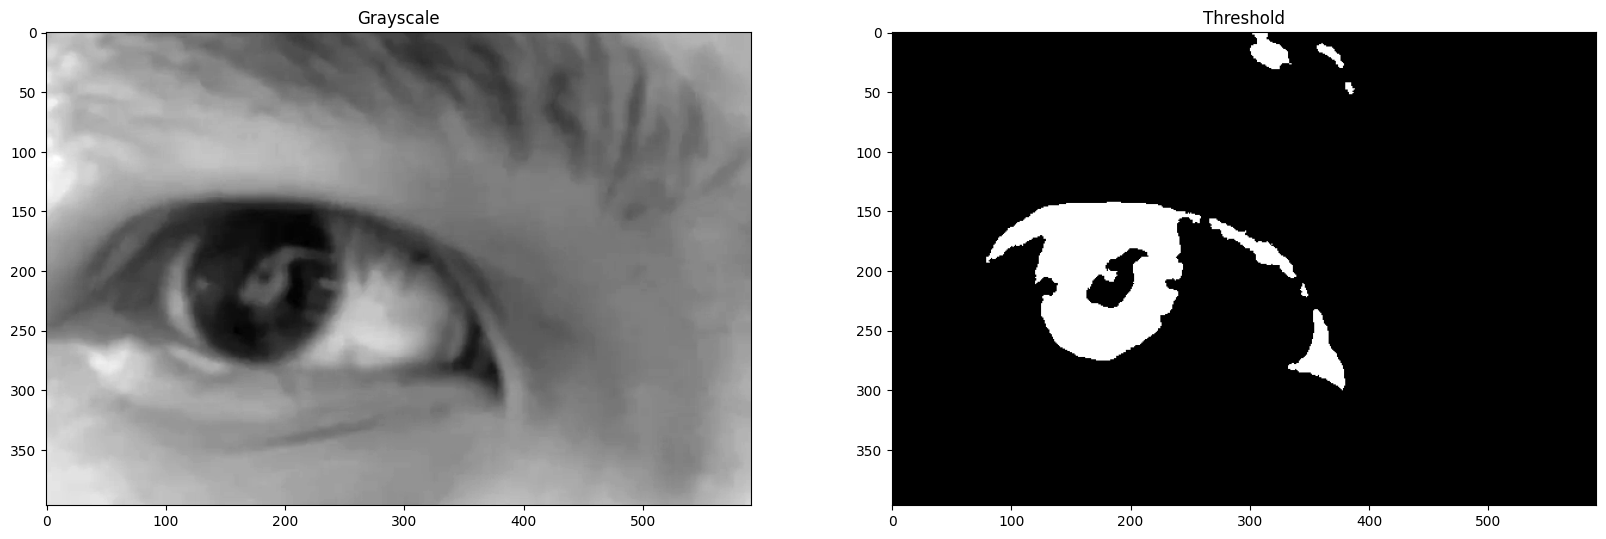

In [110]:
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Use global threshold based on grayscale intensity.
threshold = cv2.inRange(gray, 0,50)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(gray, cmap = 'gray');      plt.title('Grayscale');
plt.subplot(1,2,2); plt.imshow(threshold, cmap = 'gray'); plt.title('Threshold');

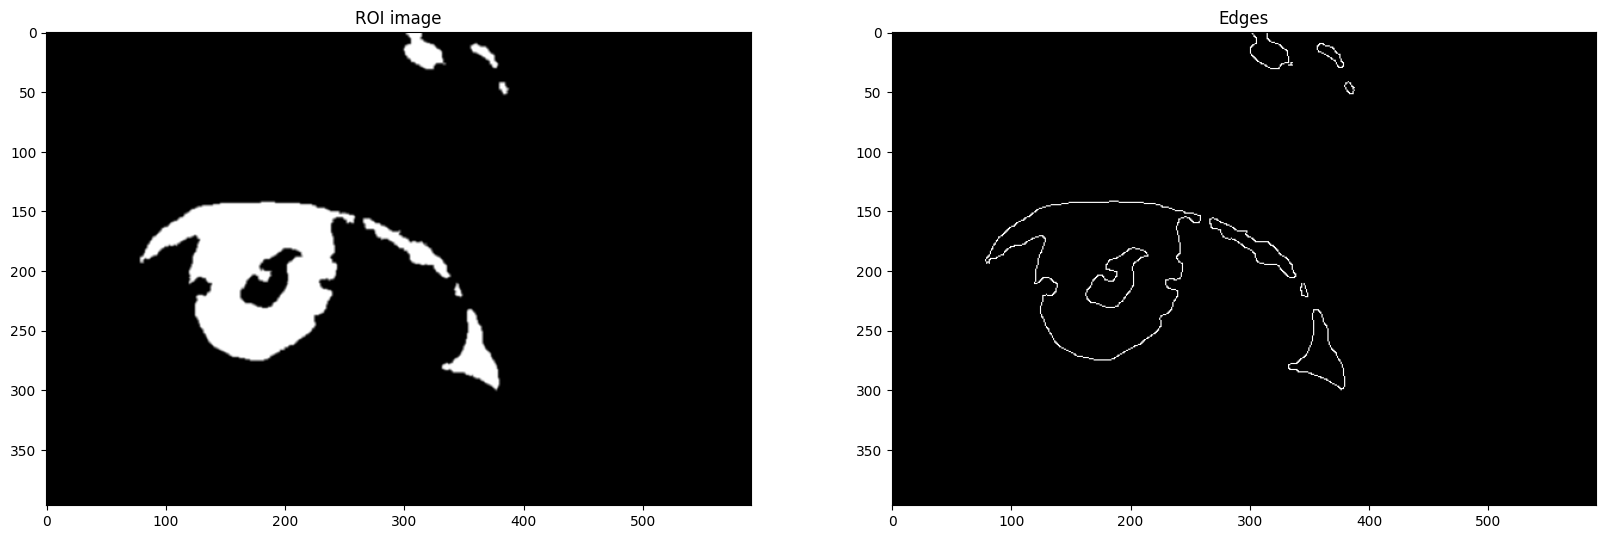

In [111]:
# Smooth with a Gaussian blur.
kernel_size = 3
blur = cv2.GaussianBlur(threshold, (kernel_size, kernel_size), 0)

# Perform Edge Detection.
low_threshold = 50
high_threshold = 100
canny_blur = cv2.Canny(blur, low_threshold, high_threshold)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(blur, cmap = 'gray'); plt.title('ROI image')
plt.subplot(1,2,2); plt.imshow(canny_blur, cmap = 'gray'); plt.title('Edges');

[[[167.5 204.5  70.1]]]


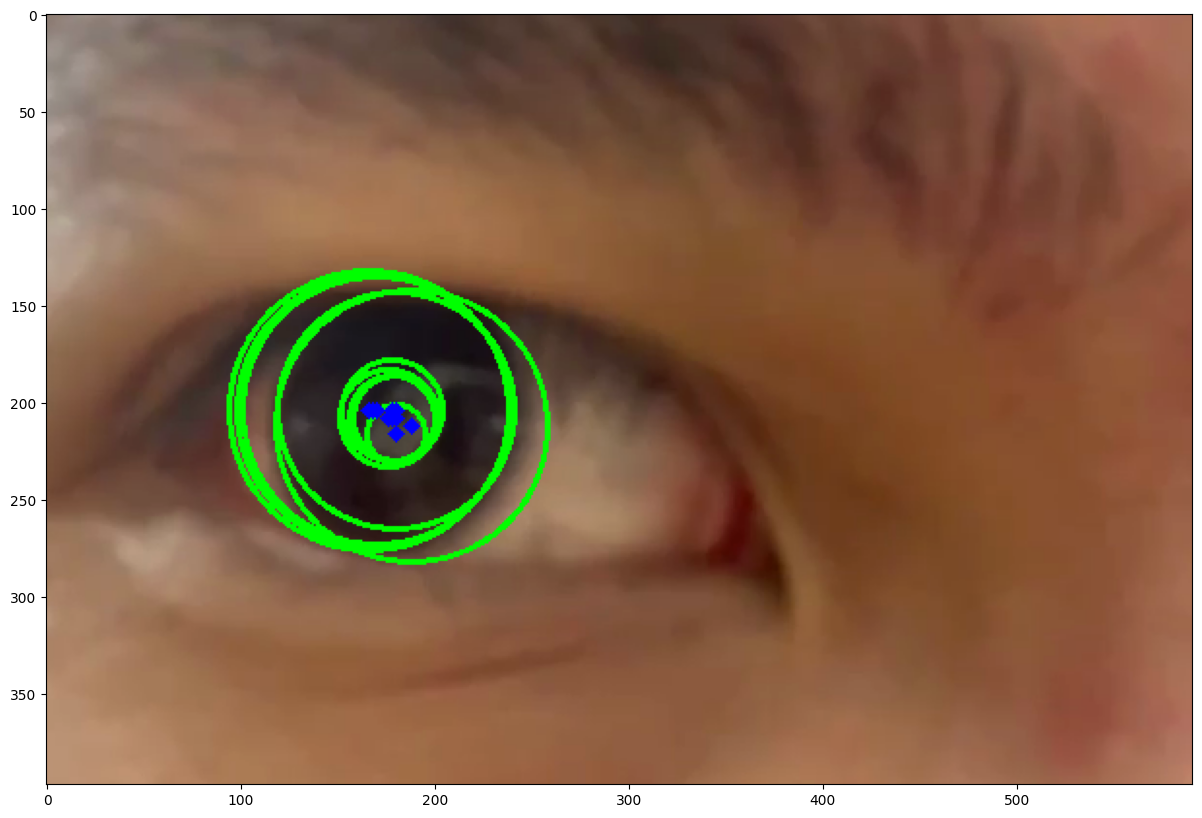

In [121]:
# Use Hough Circle Transform to detect circles (pupil)

circles = cv2.HoughCircles(canny_blur, cv2.HOUGH_GRADIENT, dp=1.0, minDist=0.2,
                            param1=100, param2=29, minRadius= 30)

print(circles)

# If circles are detected, process them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # center of the circle
        radius = circle[2]  # radius of the circle
        # Draw the circle in the output image
        cv2.circle(img, center, radius, (0, 255, 0), 2)  # green circle for pupil
        # Draw the center of the circle
        cv2.circle(img, center, 2, (0, 0, 255), 3)  # red center for pupil

plt.figure(figsize = (15, 10))
plt.imshow(img);